**Programmer:** python_scripts (Abhijith Warrier)

**PYTHON SCRIPT TO **_TRAIN & EVALUATE AN SVM CLASSIFIER WITH PROPER SCALING._** 🐍🧪📈**

This script builds a clean **Pipeline (StandardScaler → SVC)** on the Iris dataset, evaluates it with **accuracy & classification report**, plots a **confusion matrix**, and (optionally) visualizes **decision boundaries** in 2D.

### 📦 Import Libraries
We’ll use scikit-learn for data, model, and metrics; matplotlib for visuals; pandas for tidy tables.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### 📥 Load Dataset
Iris has 4 numeric features across 3 classes (`setosa`, `versicolor`, `virginica`).

In [2]:
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print("X shape:", X.shape, "| y shape:", y.shape)
print("Classes:", list(target_names))

X shape: (150, 4) | y shape: (150,)
Classes: [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]


### ✂️ Train/Test Split (Stratified)
Hold out a test set to estimate generalization; keep class balance consistent.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

### ⚙️ Build the Pipeline: **Standardize → SVC (RBF kernel)**
SVMs are **scale-sensitive**, so we standardize features inside the Pipeline to prevent leakage.

In [4]:
clf = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", C=1.0, gamma="scale", probability=False, random_state=42))
])

### 🚀 Train the Model
`fit()` runs scaling on train data and fits the SVM in one go.

In [5]:
clf.fit(X_train, y_train)

,steps,"[('scaler', ...), ('svm', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'


### 🔮 Predict & Evaluate
Compute **accuracy** and a **classification report** (precision/recall/F1 per class).

In [6]:
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

Test Accuracy: 0.9474

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.92      0.92      0.92        13
   virginica       0.92      0.92      0.92        13

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



### 📊 Confusion Matrix (Quick Visual Check)
See how predictions align with true labels across classes.

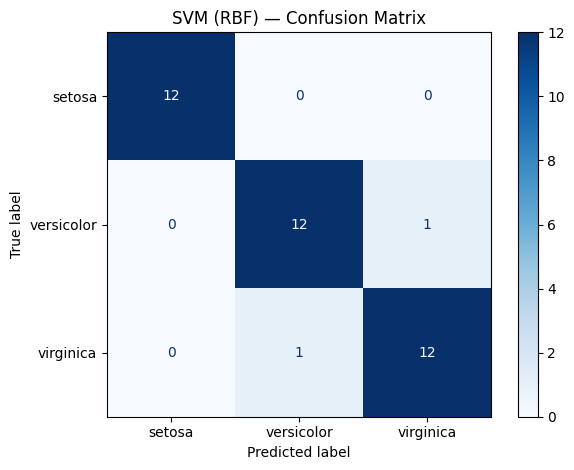

In [7]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=target_names, cmap="Blues")
plt.title("SVM (RBF) — Confusion Matrix")
plt.tight_layout()
plt.show()

### 🗺️ (Optional) Visualize 2D Decision Boundaries
Project to two features (petal length/width) and plot SVM regions.
*Tip:* This is for intuition only; the trained model above used **all 4 features**.

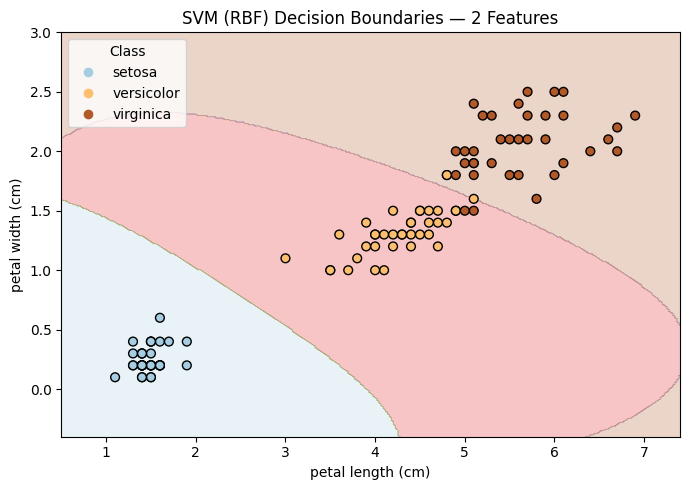

In [8]:
# Choose two informative features (indices for petal length, petal width)
f1, f2 = 2, 3
X2 = X[:, [f1, f2]]

# Re-split for this 2D visualization
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y, test_size=0.25, stratify=y, random_state=42
)

viz_clf = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42))
]).fit(X2_train, y2_train)

# Create a meshgrid
x_min, x_max = X2[:, 0].min() - 0.5, X2[:, 0].max() + 0.5
y_min, y_max = X2[:, 1].min() - 0.5, X2[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict on grid
Z = viz_clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot regions + training points
plt.figure(figsize=(7, 5))
plt.contourf(xx, yy, Z, alpha=0.25, cmap="Paired")
scatter = plt.scatter(X2_train[:, 0], X2_train[:, 1], c=y2_train, s=40, edgecolor="k", cmap="Paired")
plt.xlabel(feature_names[f1])
plt.ylabel(feature_names[f2])
plt.title("SVM (RBF) Decision Boundaries — 2 Features")
plt.legend(handles=scatter.legend_elements()[0], labels=list(target_names), title="Class", loc="upper left")
plt.tight_layout()
plt.show()

### 📝 Notes & Tips
- **Scaling is essential** for SVMs — always include `StandardScaler` in a Pipeline.
- Start with `kernel="rbf"`, `C=1.0`, `gamma="scale"`; tune with **GridSearchCV**.
- Larger `C` → less regularization (can overfit); smaller `C` → more regularization.
- For linear problems or very high-dimensional sparse data, try `LinearSVC`.
- Use **StratifiedKFold** + cross-validation to get stable performance estimates.